In [5]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib inline 
%config InlineBackend.figure_format = 'svg' #矢量图比较高清
# %config InlineBackend.figure_format = 'retina'

In [6]:
# 源图像文件名
pet_name="./pet/PI1050000"

# 读入原图像
src_img = sitk.ReadImage(pet_name)

# 原图四个要素,间距，size，原点，方向
input_spacing=src_img.GetSpacing()
input_size = src_img.GetSize() # width=input_size[0],height=input_size[1]
input_origin = src_img.GetOrigin()
input_direction = src_img.GetDirection()
input_pixelid = src_img.GetPixelID()

In [7]:
# 测试

print(input_size)
print(input_origin)
print(input_spacing)
print(input_direction)
print(input_pixelid)

(128, 128, 1)
(-347.265625, -347.265625, -442.55964660681)
(5.46875, 5.46875, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
9


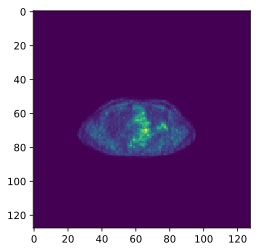

In [8]:
src_show = sitk.GetArrayViewFromImage(src_img)
plt.imshow(src_show[0,:,:])
plt.show()

In [9]:
# resample图要素
newWidth = 512
newHeight = 512
# 通过size计算间距
x_out_spacing = input_spacing[0]*input_size[0] / newWidth
y_out_spacing = input_spacing[1]*input_size[1] / newHeight

In [10]:
x_out_spacing

1.3671875

In [11]:
y_out_spacing

1.3671875

In [12]:
output_size =(newWidth,newHeight,1)

In [13]:
output_size

(512, 512, 1)

In [15]:
output_spacing = (x_out_spacing,y_out_spacing,1)

In [16]:
output_spacing

(1.3671875, 1.3671875, 1)

In [17]:
output_origin = input_origin
output_direction = input_direction
output_pixelid = input_pixelid

In [18]:
output_origin

(-347.265625, -347.265625, -442.55964660681)

In [19]:
output_direction

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [20]:
output_pixelid

9

In [22]:
transform = sitk.Transform()

In [15]:
interpolator = sitk.sitkNearestNeighbor
resampled_img = sitk.Resample(src_img,output_size,transform,interpolator,output_origin,output_spacing,output_direction,0.0,output_pixelid)

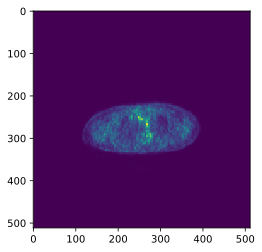

In [16]:
resampled_show = sitk.GetArrayViewFromImage(resampled_img)
plt.imshow(resampled_show[0,:,:])
plt.show()


In [17]:
resampled_img

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x000002637001D2D0> >

In [30]:
sitk.WriteImage( src_img, "./pet/0.dcm" ) # 读入原图并把原图写回，没有出错。

In [25]:
# meta-data信息
all_keys = src_img.GetMetaDataKeys()

In [19]:
all_keys

('0008|0008',
 '0008|0012',
 '0008|0013',
 '0008|0014',
 '0008|0016',
 '0008|0018',
 '0008|0020',
 '0008|0021',
 '0008|0022',
 '0008|0023',
 '0008|0030',
 '0008|0031',
 '0008|0032',
 '0008|0033',
 '0008|0050',
 '0008|0060',
 '0008|0061',
 '0008|0070',
 '0008|0080',
 '0008|0090',
 '0008|1010',
 '0008|1030',
 '0008|103e',
 '0008|1060',
 '0008|1070',
 '0008|1090',
 '0010|0010',
 '0010|0020',
 '0010|0021',
 '0010|0030',
 '0010|0040',
 '0010|1000',
 '0010|1001',
 '0010|1010',
 '0010|1020',
 '0010|1030',
 '0010|2160',
 '0010|2180',
 '0018|0015',
 '0018|0050',
 '0018|0071',
 '0018|0073',
 '0018|0074',
 '0018|0075',
 '0018|1000',
 '0018|1020',
 '0018|1030',
 '0018|1074',
 '0018|1083',
 '0018|1084',
 '0018|1100',
 '0018|1120',
 '0018|1130',
 '0018|1147',
 '0018|1149',
 '0018|1181',
 '0018|1210',
 '0018|1242',
 '0018|5100',
 '0020|000d',
 '0020|000e',
 '0020|0010',
 '0020|0011',
 '0020|0013',
 '0020|0020',
 '0020|0032',
 '0020|0037',
 '0020|0052',
 '0020|1040',
 '0020|1041',
 '0020|1208',
 '0028

In [23]:
print(len(all_keys))

124


In [24]:
keys = resampled_img.GetMetaDataKeys()
keys

()

In [28]:
# 从源图像复制字典，并覆盖特定的字段
for key in all_keys:
    resampled_img.SetMetaData(key,src_img.GetMetaData(key))

In [31]:
m=src_img.GetMetaData("0028|0010")
m

'128'

In [32]:
type(m)

str

In [33]:
type(output_size[0])

int

In [34]:
resampled_img.SetMetaData("0028|0010",str(output_size[0]))
resampled_img.SetMetaData("0028|0011",str(output_size[1]))

In [35]:
keys = resampled_img.GetMetaDataKeys()
keys

('0008|0008',
 '0008|0012',
 '0008|0013',
 '0008|0014',
 '0008|0016',
 '0008|0018',
 '0008|0020',
 '0008|0021',
 '0008|0022',
 '0008|0023',
 '0008|0030',
 '0008|0031',
 '0008|0032',
 '0008|0033',
 '0008|0050',
 '0008|0060',
 '0008|0061',
 '0008|0070',
 '0008|0080',
 '0008|0090',
 '0008|1010',
 '0008|1030',
 '0008|103e',
 '0008|1060',
 '0008|1070',
 '0008|1090',
 '0010|0010',
 '0010|0020',
 '0010|0021',
 '0010|0030',
 '0010|0040',
 '0010|1000',
 '0010|1001',
 '0010|1010',
 '0010|1020',
 '0010|1030',
 '0010|2160',
 '0010|2180',
 '0018|0015',
 '0018|0050',
 '0018|0071',
 '0018|0073',
 '0018|0074',
 '0018|0075',
 '0018|1000',
 '0018|1020',
 '0018|1030',
 '0018|1074',
 '0018|1083',
 '0018|1084',
 '0018|1100',
 '0018|1120',
 '0018|1130',
 '0018|1147',
 '0018|1149',
 '0018|1181',
 '0018|1210',
 '0018|1242',
 '0018|5100',
 '0020|000d',
 '0020|000e',
 '0020|0010',
 '0020|0011',
 '0020|0013',
 '0020|0020',
 '0020|0032',
 '0020|0037',
 '0020|0052',
 '0020|1040',
 '0020|1041',
 '0020|1208',
 '0028

In [36]:
print(len(keys))

124


In [37]:
sitk.WriteImage(resampled_img,"./pet/512.dcm")

In [38]:
image = sitk.ReadImage("./pet/512.dcm")

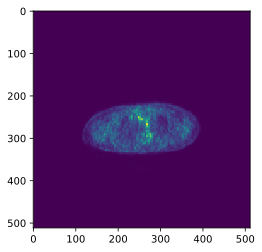

In [39]:
image_show = sitk.GetArrayViewFromImage(image)
plt.imshow(image_show[0,:,:])
plt.show()

In [41]:
linear_img =  sitk.Resample(src_img,output_size,transform,sitk.sitkLinear,output_origin,output_spacing,output_direction,0.0,output_pixelid)
nearest_img = sitk.Resample(src_img,output_size,transform,sitk.sitkNearestNeighbor,output_origin,output_spacing,output_direction,0.0,output_pixelid)
bspline_img = sitk.Resample(src_img,output_size,transform,sitk.sitkBSpline,output_origin,output_spacing,output_direction,0.0,output_pixelid)



In [43]:
for key in all_keys:
    linear_img.SetMetaData(key,src_img.GetMetaData(key))
linear_img.SetMetaData("0028|0010",str(output_size[0]))
linear_img.SetMetaData("0028|0011",str(output_size[1]))
sitk.WriteImage(linear_img,"./pet/linear.dcm")

for key in all_keys:
    nearest_img.SetMetaData(key,src_img.GetMetaData(key))
nearest_img.SetMetaData("0028|0010",str(output_size[0]))
nearest_img.SetMetaData("0028|0011",str(output_size[1]))
sitk.WriteImage(nearest_img,"./pet/nearest.dcm")


for key in all_keys:
    bspline_img.SetMetaData(key,src_img.GetMetaData(key))
bspline_img.SetMetaData("0028|0010",str(output_size[0]))
bspline_img.SetMetaData("0028|0011",str(output_size[1]))
sitk.WriteImage(nearest_img,"./pet/bspline.dcm")

In [23]:
img =  sitk.Resample(src_img,output_size,transform,sitk.sitkLinear,output_origin,output_spacing,output_direction,0.0,output_pixelid)

In [26]:
for key in all_keys:
    img.SetMetaData(key,src_img.GetMetaData(key))
img.SetMetaData("0028|0010",str(output_size[0]))
img.SetMetaData("0028|0011",str(output_size[1]))
sitk.WriteImage(img,"./pet/R_PI1050000.dcm")